In [2]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df=pd.read_csv('./output/project/퍼센트/통합장르백분률.csv')
df1=pd.read_csv('./output/project/퍼센트/통합세부장르백분률.csv')
df2=pd.read_csv('./output/project/퍼센트/유튜브장르퍼센트.csv')

In [3]:
df.set_index(keys='index',inplace=True)
#df1.set_index(keys='index',inplace=True)
df2.set_index(keys='index',inplace=True)

In [4]:
df3=pd.concat([df,df2],axis=1)

In [5]:
df3

,cnt,percent,cnt,percent
index,,,,
액션,5230.0,10.46,NaN,NaN
모혐,200.0,0.40,NaN,NaN
애니메이션,5061.0,10.12,9.0,9.09
코미디,3117.0,6.23,3.0,3.03
범죄,3705.0,7.41,NaN,NaN
드라마,7192.0,14.38,NaN,NaN
공포,2000.0,4.00,NaN,NaN
스릴러,2233.0,4.47,NaN,NaN
미스테리,1200.0,2.40,NaN,NaN


In [6]:
df3=pd.DataFrame(df3.percent.sum(axis=1))

In [7]:

df3=df3.rename(columns={0:'percent'})

In [8]:
df3

,percent
index,
액션,10.46
모혐,0.40
애니메이션,19.21
코미디,9.26
범죄,7.41
드라마,14.38
공포,4.00
스릴러,4.47
미스테리,2.40


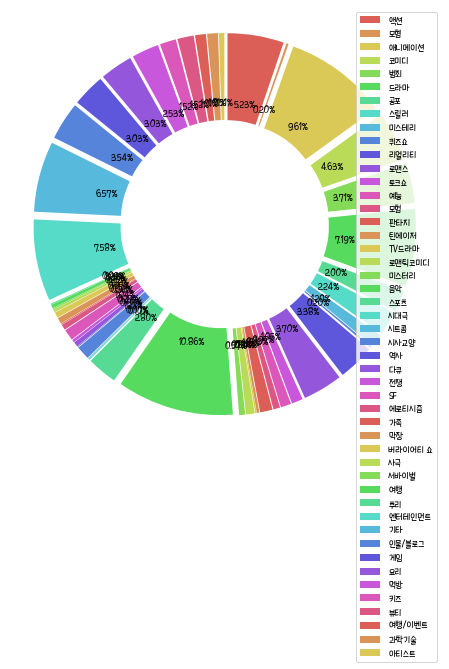

In [9]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df3.index)):
    explode.append(0.1)

pie = ax.pie(df3.percent,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],df3.index) ## 범례 표시
plt.show()

In [10]:
#adf3.loc[:,['index','percent']]

In [11]:
df3
percent=[]
for i in range(len(df3.index)):
    percent.append((df3.percent[i]))

In [12]:


df3=df3.rename(columns={'percent':'cnt'})
df3

,cnt
index,
액션,10.46
모혐,0.40
애니메이션,19.21
코미디,9.26
범죄,7.41
드라마,14.38
공포,4.00
스릴러,4.47
미스테리,2.40


In [13]:

cntsum=pd.DataFrame(df3.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(df3.cnt[0]/cntsum.a)*100

df3
a=[]
for i in range(len(df3.index)):
    a.append((df3.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(df3.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

adf3=df3.reset_index()
adf3=pd.concat([adf3,percent],axis=1)
adf3
adf3.set_index('index',inplace=True)

In [14]:
adf3.to_csv('./output/project/퍼센트/유트브포함.csv')

In [88]:
adf3.to_csv('./output/project/퍼센트/유튜브,TV,OTT통합장르.csv')

In [107]:
df1.set_index(keys='index',inplace=True)

In [108]:
df4=pd.concat([df1,df2],axis=1)

In [109]:
df4

,cnt,percent,cnt,percent
index,,,,
애니메이션,3675.0,9.19,9.0,9.09
범죄,1262.0,3.16,NaN,NaN
드라마,3358.0,8.40,NaN,NaN
스릴러,4164.0,10.41,NaN,NaN
코미디,1473.0,3.68,3.0,3.03
로맨스,5530.0,13.83,NaN,NaN
공포,650.0,1.63,NaN,NaN
좀비,1351.0,3.38,NaN,NaN
음식,1053.0,2.63,NaN,NaN


In [111]:
df4=pd.DataFrame(df4.percent.sum(axis=1))
df4=df4.rename(columns={0:'percent'})

In [112]:
df4

,percent
index,
애니메이션,18.28
범죄,3.16
드라마,8.40
스릴러,10.41
코미디,6.71
로맨스,13.83
공포,1.63
좀비,3.38
음식,2.63


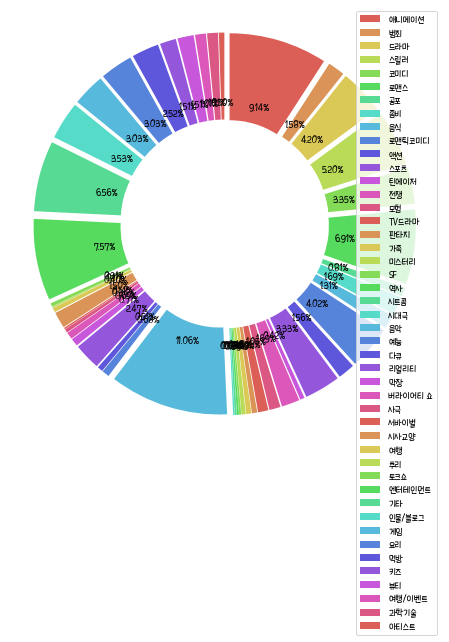

In [114]:
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df4.index)):
    explode.append(0.1)

pie = ax.pie(df4.percent,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],df4.index) ## 범례 표시
plt.show()

In [115]:
df4
percent=[]
for i in range(len(df4.index)):
    percent.append((df4.percent[i]))


In [116]:
df4=df4.rename(columns={'percent':'cnt'})
df4


,cnt
index,
애니메이션,18.28
범죄,3.16
드라마,8.40
스릴러,10.41
코미디,6.71
로맨스,13.83
공포,1.63
좀비,3.38
음식,2.63


In [117]:
cntsum=pd.DataFrame(df4.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(df4.cnt[0]/cntsum.a)*100

df4
a=[]
for i in range(len(df4.index)):
    a.append((df4.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(df4.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

adf4=df4.reset_index()
adf4=pd.concat([adf4,percent],axis=1)
adf4
adf4.set_index('index',inplace=True)

In [118]:
adf4

,cnt,percent
index,,
애니메이션,18.28,9.14
범죄,3.16,1.58
드라마,8.40,4.20
스릴러,10.41,5.20
코미디,6.71,3.35
로맨스,13.83,6.91
공포,1.63,0.81
좀비,3.38,1.69
음식,2.63,1.31


99.91000000000004